In [24]:
from jupyterthemes import jtplot
jtplot.style(theme="oceans16", context="notebook", ticks=True, grid=False)

In [2]:
#레이블 인코딩

from sklearn.preprocessing import LabelEncoder

items = ["TV", '냉장고', "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값:", labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [4]:
print("인코딩 클래스:", encoder.classes_)
print("디코딩 원본 값:", encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [ ]:
# 레이블 인코딩은 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용시 예측 성능이 떨어진다.
# 즉 숫자값의 경우 크고 작음에 대한 특성이 작용하기 때문. (선형 회귀와 같은 ML에는 적용시키면 안된다.)
# 이를 해결하기 위한것이 원-핫 인코딩

In [6]:
# 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지는 0

from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", '선풍기', '믹서', '믹서']
# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용
oh_encoder =OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("원핫 인코딩 데이터")
print(oh_labels.toarray())
print("원핫 인코딩 데이터 차원")
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(8, 6)


In [8]:
# pandas 에서 get_dummies()를 사용하여 더욱 간편하게 원핫 인코더로 하자.

import pandas as pd

df = pd.DataFrame({"item": ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
# 피처 스케일링과 정규화
# - 서로다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
# 표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포로 변환

### 표준화
$$x' = \frac{x-\overline{x}}{\sigma}$$

- 새로운 피처 x의 데이터는, x를 평균값으로 빼고 표준편차로 나누면 된다

### 정규화
$$x' = \frac{x-min(x)}{max(x)-min(x)}$$
- 예를들어 피처 A는 거리를 나타내고, B는 금액을 나타낼때, 비교하기 위해 0~최대1의 값으로 변환

##### 사이킷 런에서 전처리 Normalizer는 선형대수에서의 정규화 개념이 적용됨. 개별 벡터의 크기를 맞추기 위해 변환하는것을 의미
##### 3개의 피처가 x,y,z 가 있다고 치면 새로운 x는 원래값에서 세개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눔

$$x_i\underline{ }new= \frac{x_i}{\sqrt{x_i^{2}+y_i^{2}+z_i^{2}}}$$

In [12]:
# StandardScaler, 평균0, 분산1로 바꿔줌. SVM, Linear Regression, Logistic Regression에서 데이터가 가우시안
# 정규분포를 따른다고 가정하기 때문에, 예측 성능 향상에 중요한 요소가 됨
import sklearn
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)

print("feature들의 평균 값")
print(iris_df.mean())
print("\nfeature 들의 분산 값")
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [13]:
# StandardScaler를 사용

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature 들의 평균값")
print(iris_df_scaled.mean())
print("\nfeature 들의 분산 값")
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [14]:
# MinMaxScaler, 데이터 값을 0과 1사이, 음수값이 있을 시 -1, 1 사이로 변환

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transoform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최솟값")
print(iris_df_scaled.min())
print("\nfeature들의 최댓값")
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [11]:
# 사이킷런으로 수행하는 타이타닉 생존자 예측

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# scikit-learn은 Null값을 허용하지 않으므로, 어떻게할지?
# - 이번엔 fillna()로 해봅시당

titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df["Embarked"].fillna("N", inplace=True)
print("데이터 세트 Null값 개수", titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 0


In [15]:
print("Sex 값 분포: \n", titanic_df["Sex"].value_counts())
print("\n Cabin 값 분포: \n", titanic_df["Cabin"].value_counts())
print("\n Embarked 값 분포: \n", titanic_df["Embarked"].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
B37              1
C111             1
D6               1
A31              1
B19              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [18]:
#Cabin의 경우 앞의 숫자가 중요해보임. 앞문자만 남김
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [19]:
#Sex가 생존에 어떤 영향을 끼쳤는지 우선 파악해봅시다.
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

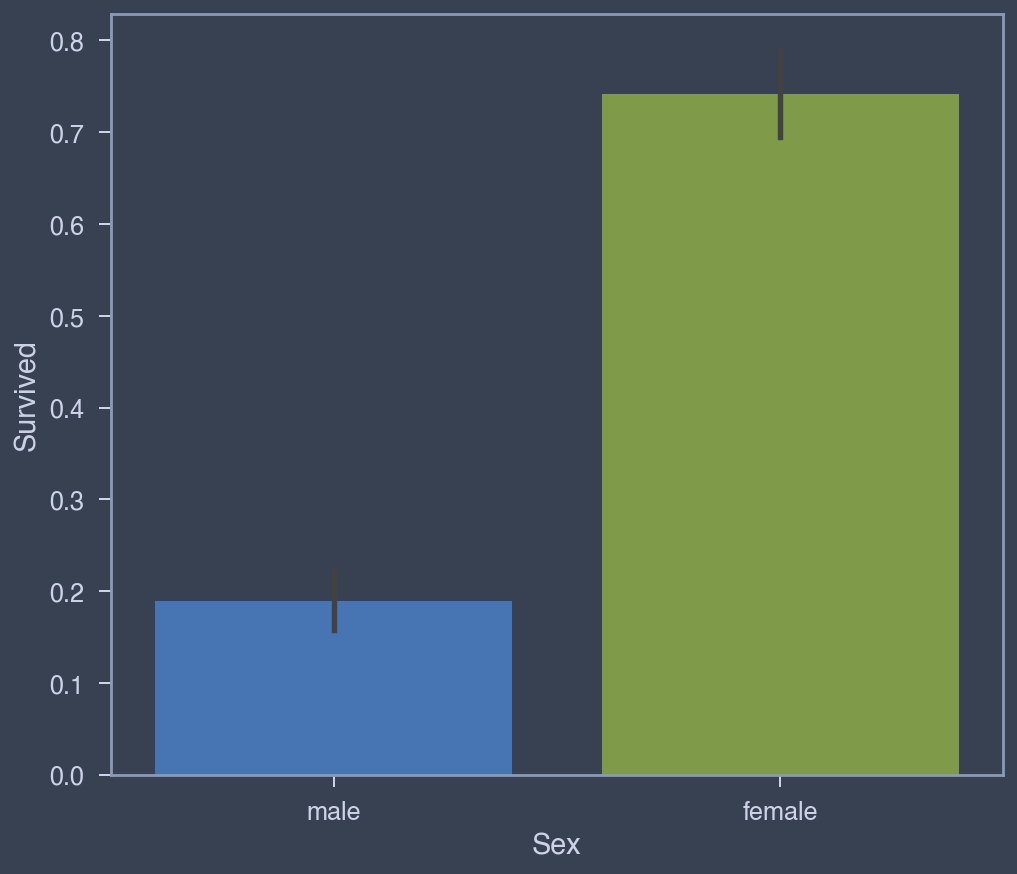

In [25]:
sns.barplot(x="Sex", y = "Survived", data=titanic_df)

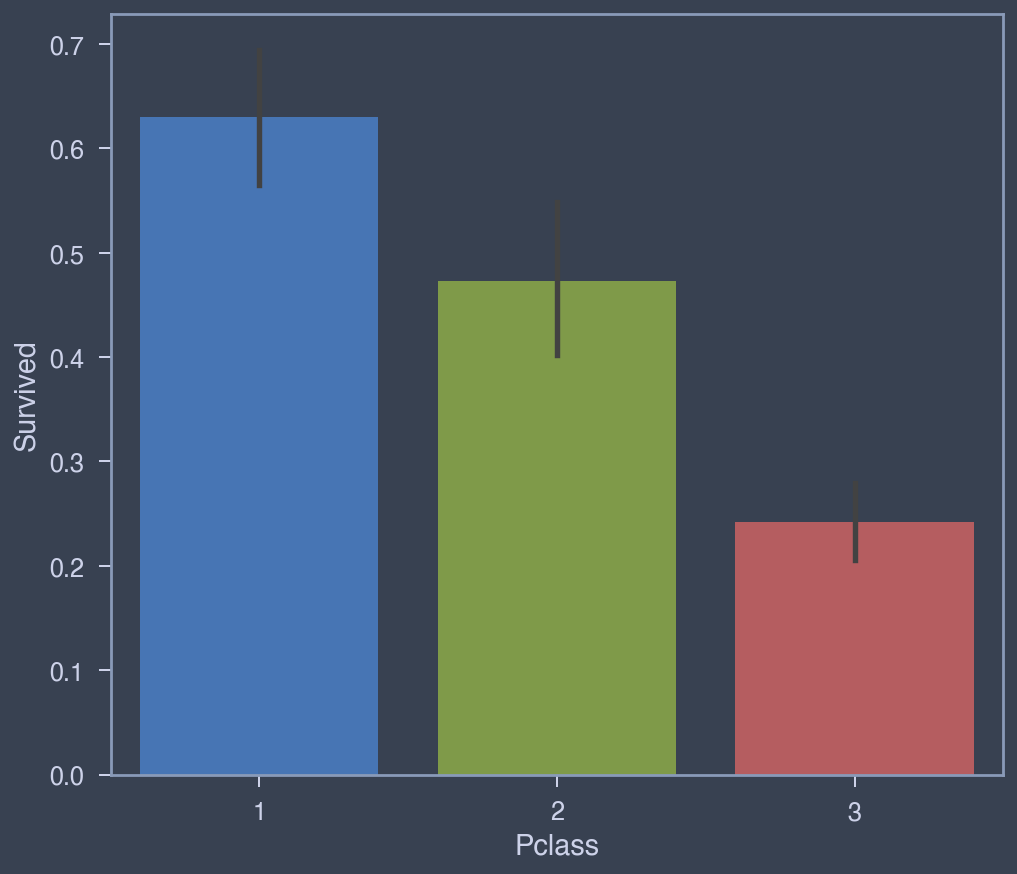

In [27]:
#부자와 가난한 사람관련해서 그래프 그려보장
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

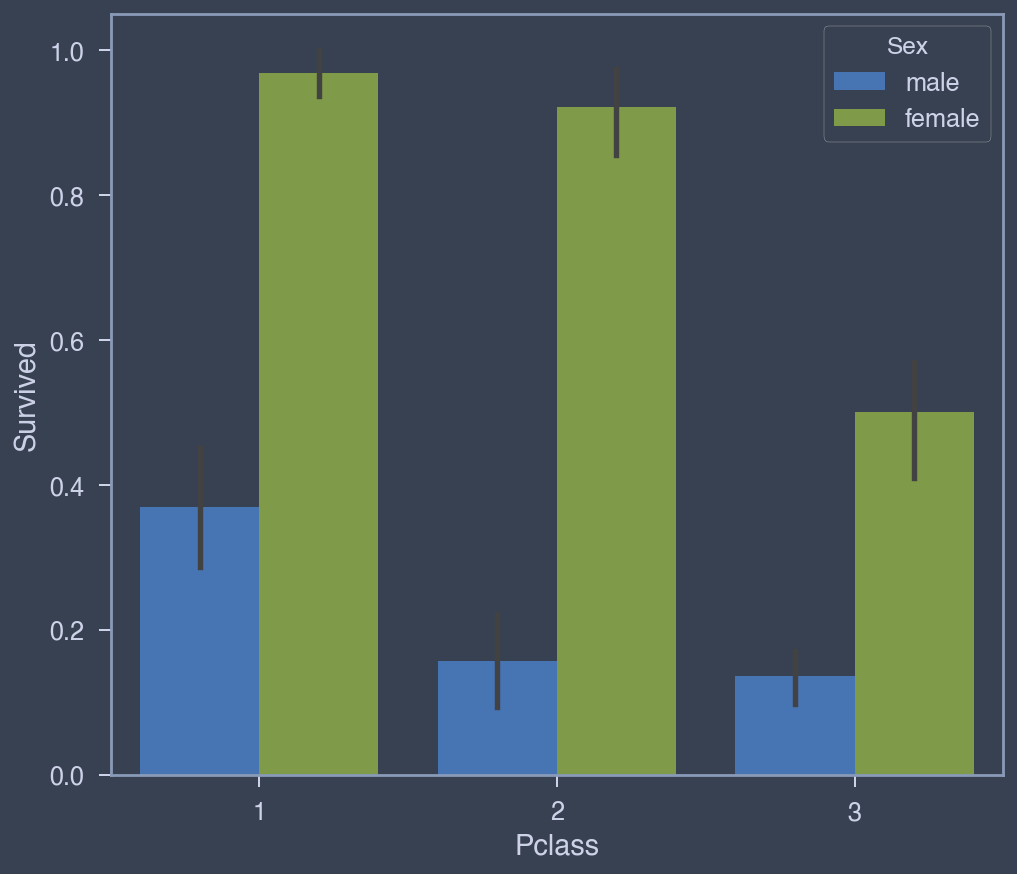

In [28]:
#부자와 가난한 사람관련해서 그래프 그려보장
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

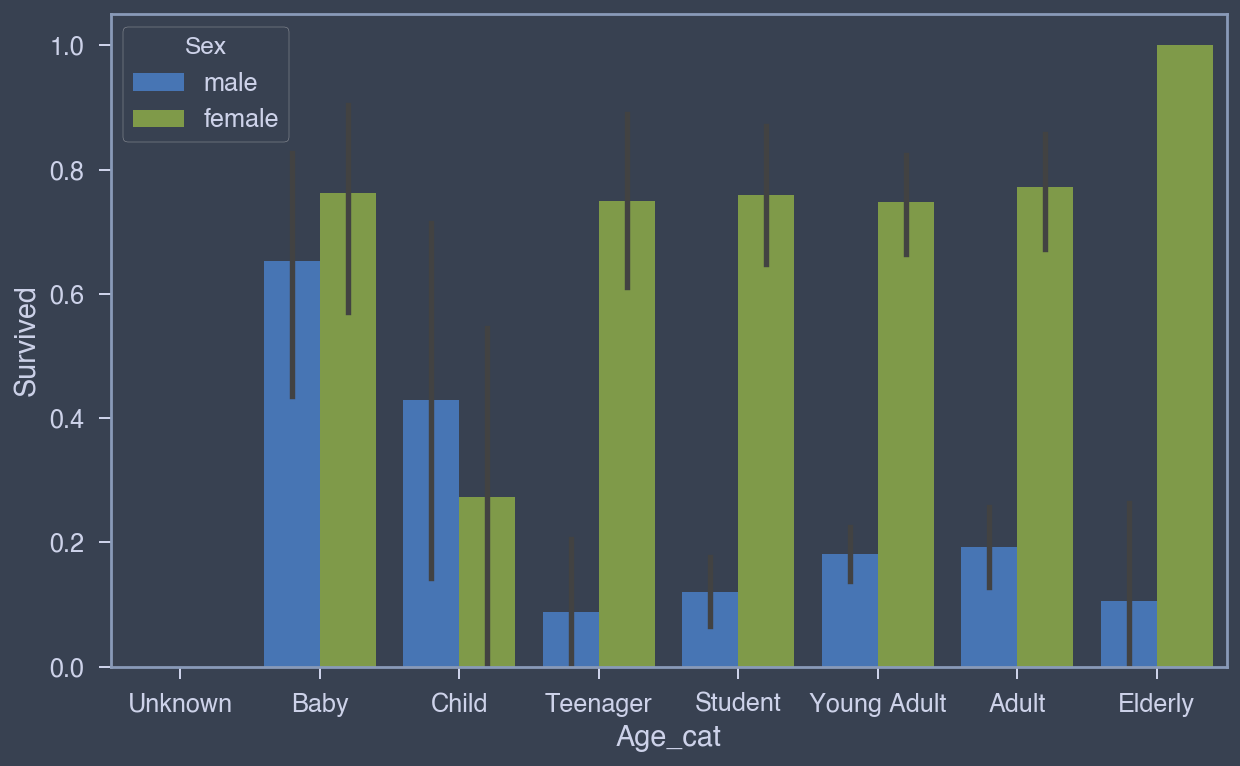

In [29]:
# age따라 한번 봅시다

def get_category(age):
    cat = ""
    if age <= -1: cat = "Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else: cat = "Elderly"
    return cat
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기
group_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x: get_category(x))
sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=titanic_df, order=group_names)
titanic_df.drop("Age_cat", axis=1, inplace=True)

In [30]:
# 나머지 feature들을 label 인코딩 합시다.
from sklearn import preprocessing

def encode_features(dataDF):
    features = ["Cabin", 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [31]:
# Null 처리 함수
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

In [36]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    from sklearn import preprocessing
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [39]:
# 원본 데이터를 재로딩하고, feature 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv("titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state= 11)

In [44]:
# DecisionTree, RandomForest, LogisticRegression 을 사용하여 학습,평가해봅시다
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도:{0:.4f}".format(accuracy_score(y_test, rf_pred)))


# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
# 아직 최적화를 안해서 위의 작업은 정확하지 않음
# KFold 교차검증을 해봅시다

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객ㅊ페를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
        # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [48]:
# cross_val_score() API로 해봅시당. stratifiedKFold를 사용한다.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [49]:
# GridSearchCV를 이용, DTC의 최적 하이퍼 패러미터를 찾고, 예측 성능을 측정해보자
# CV는 5개의 폴드세트, max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능 측정

from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[2,3,5,10], "min_samples_split":[2,3,5], "min_samples_leaf":[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 패러미터:", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 패러미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifer 정확도: {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 패러미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifer 정확도: 0.8715
